<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Sarah Litz

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [52]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

In [2]:
#Your code for 1A here

#  import data
filepath = 'voters1800.csv'
df = pd.read_csv(filepath) #load the data into a DataFrame
df.head() #displays the start of the data frame (first 5 displayed below, can also specify a num w/in the parentheses 


,CitizenID,Age,State,Interest1,Interest2,Interest3
0,0,44,Massachusets,Farming,Alcohol & Tobacco,French Revolution
1,1,49,Virginia,Economy,Alcohol & Tobacco,Democracy
2,2,36,Virginia,Religion,Economy,Farming
3,3,33,Massachusets,Family,French Revolution,Alcohol & Tobacco
4,4,52,Massachusets,Democracy,Alcohol & Tobacco,Religion


STATISTICAL DESCRIPTION: 

In [7]:
#  number of voters in each state 
dfState = df.groupby(by="State")
print(dfState.size())

dfMA = df.loc[df["State"] == "Massachusets"].copy()
dfNY = df.loc[df["State"] == "New York"].copy()
dfSC = df.loc[df["State"] == "South Carolina"].copy()
dfVA = df.loc[df["State"] == "Virginia"].copy()

State
Massachusets      230
New York          240
South Carolina    231
Virginia          231
dtype: int64


In [8]:
#  Tukey 5 nubmer summary of age for voters in EACH state 
print("\n           Age Summary by State\n")

print("Massachusets: \n", dfMA["Age"].describe())
print("\nNew York: \n", dfNY["Age"].describe())
print("\nSouth Carolina: \n", dfSC["Age"].describe())
print("\nVirginia: \n", dfVA["Age"].describe())





           Age Summary by State

Massachusets: 
 count    230.000000
mean      49.656522
std       18.929179
min       18.000000
25%       32.000000
50%       50.000000
75%       67.000000
max       79.000000
Name: Age, dtype: float64

New York: 
 count    240.000000
mean      49.045833
std       17.771268
min       18.000000
25%       36.000000
50%       48.000000
75%       63.000000
max       79.000000
Name: Age, dtype: float64

South Carolina: 
 count    231.000000
mean      50.424242
std       18.924843
min       18.000000
25%       33.500000
50%       52.000000
75%       67.000000
max       80.000000
Name: Age, dtype: float64

Virginia: 
 count    231.000000
mean      48.709957
std       17.745736
min       18.000000
25%       33.500000
50%       49.000000
75%       64.500000
max       80.000000
Name: Age, dtype: float64


In [20]:
#  A description of the distribution of interests
#     Consider how to represent the distribution of first, second, and third interests
#     Consider the breakdown by state

#    group by interest 
dfInterest1=df.groupby(by="Interest1")
print(dfInterest1.size())

print("\n")
dfInterest2=df.groupby(by="Interest2")
print(dfInterest2.size())

print("\n")
dfInterest3=df.groupby(by="Interest3")
print(dfInterest3.size())


Interest1
Alcohol & Tobacco    118
Democracy            143
Economy              118
Family               135
Farming              142
French Revolution    138
Religion             138
dtype: int64


Interest2
Alcohol & Tobacco    145
Democracy            137
Economy              141
Family               134
Farming              118
French Revolution    124
Religion             133
dtype: int64


Interest3
Alcohol & Tobacco    141
Democracy            122
Economy              139
Family               114
Farming              139
French Revolution    136
Religion             141
dtype: int64

       Interests By State


In [46]:
#   INTEREST BREAKDOWN BY STATE
print("\n","      Interests By State")


print("    1. Massachusetts \n ")
dfMA_1 = dfMA.groupby(by="Interest1")
print(dfMA_1.size())
print("\n")
dfMA_2 = dfMA.groupby(by="Interest2")
print(dfMA_2.size())
print("\n")
dfMA_3 = dfMA.groupby(by="Interest3")
print(dfMA_3.size())
print("\n")

print("    2. New York \n ")
dfNY_1 = dfNY.groupby(by="Interest1")
print(dfNY_1.size())
print("\n")
dfNY_2 = dfNY.groupby(by="Interest2")
print(dfNY_2.size())
print("\n")
dfNY_3 = dfNY.groupby(by="Interest3")
print(dfNY_3.size())
print("\n")

print("    3. South Carolina \n ")
dfSC_1 = dfSC.groupby(by="Interest1")
print(dfSC_1.size())
print("\n")
dfSC_2 = dfSC.groupby(by="Interest2")
print(dfSC_2.size())
print("\n")
dfSC_3 = dfSC.groupby(by="Interest3")
print(dfSC_3.size())
print("\n")

print("    4. Virginia \n ")
dfVA_1 = dfVA.groupby(by="Interest1")
print(dfVA_1.size())
print("\n")
dfVA_2 = dfVA.groupby(by="Interest2")
print(dfVA_2.size())
print("\n")
dfVA_3 = dfVA.groupby(by="Interest3")
print(dfVA_3.size())
print("\n")



       Interests By State
    1. Massachusetts 
 
Interest1
Alcohol & Tobacco    32
Democracy            33
Economy              20
Family               39
Farming              36
French Revolution    34
Religion             36
dtype: int64


Interest2
Alcohol & Tobacco    42
Democracy            35
Economy              29
Family               35
Farming              30
French Revolution    34
Religion             25
dtype: int64


Interest3
Alcohol & Tobacco    38
Democracy            18
Economy              37
Family               34
Farming              34
French Revolution    29
Religion             40
dtype: int64


    2. New York 
 
Interest1
Alcohol & Tobacco    34
Democracy            36
Economy              31
Family               35
Farming              38
French Revolution    27
Religion             39
dtype: int64


Interest2
Alcohol & Tobacco    31
Democracy            38
Economy              40
Family               34
Farming              29
French Revolution    28
Reli

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

In [62]:
#Your code for 1B here


#base probability: each voter equally likely to vote federalist vs. democratic-republican
    #if voter is from same state as nominee then (+.01 likely to vote) so 50.1% for party of nominee
    #if voter is from same state as VP then (+.05 likely to veote) so 50.05% for party of VP nominee 
    
        #MA: 16 votes, split by electroal districts, assume even split among voters 
        #NY: 12 votes, winner-take-all
        #VA: 21 votes, split by electoral districts, assume even split among voters 
        #SC: 8 votes, winner-take-all

#find expected outcome for an election in the four states 
#    Massachusetts expected outcome 
#50.1% will vote Federalist Ticket, 49.9% will vote Democratic-Republican ticket 
print("      Expected Outcome of Election by State \n") 
print("Massachusetts: 50.1% Fed, 49.9% D-R \n")
print("New York: 49.95% Fed, 50.05% D-R \n")
print("Virginia: 49.9% Fed, 50.1% D-R \n")
print("South Carolina: 50.05% Fed, 49.95% D-R \n")




    #The Candidates
        #Federalist Ticket
        #John Adams - Massachusetts
        #(VP)Charles Cotesworth Pinckney - South Carolina

        #Democratic-Republican Ticket
        #Thomas Jefferson - Virgina
        #(VP)Aaron Burr - New York



#find how many electoral college votes each party ticket will receive 
print("    Expected Number of Electoral College Votes by Party") 
print("Federalist: ", 8 + 0 + 10 + 8)
print("Democratic-Republican: ", 8 + 12 + 11 + 0)


      Expected Outcome of Election by State 

Massachusetts: 50.1% Fed, 49.9% D-R 

New York: 49.95% Fed, 50.05% D-R 

Virginia: 49.9% Fed, 50.1% D-R 

South Carolina: 50.05% Fed, 49.95% D-R 

    Expected Number of Electoral College Votes by Party
Federalist:  26
Democratic-Republican:  31


<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

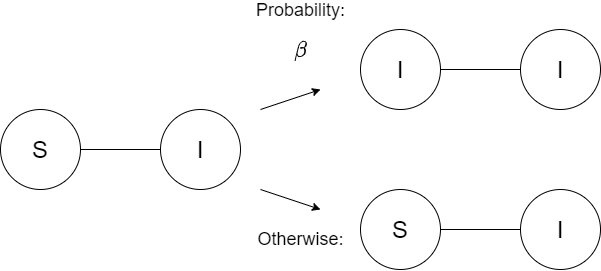

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

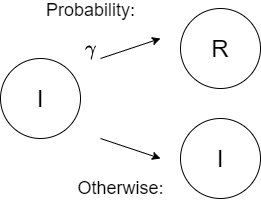

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

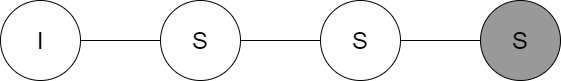

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

**Solution to Part A**:

Let $E_1$ = the event that the last node on the right goes from being susceptible to infected. \
Let $N_i$ represent the nodes, where 0 is the leftmost node, and 3 is the rightmost node. \
P(infection) = $\beta$

$
P(E_1) = P(N_1=I) \cap P(N_2=I) \cap P(N_3=I) \\
= \beta * \beta * \beta  \\
= \beta^3
$

Let $E_2$ = the event that the leftmost node is still infected at time t=3. \
$
P(E_2) = P(N_0 = \neg R) \cap P(N_0 = \neg R) \cap P(N_0 = \neg R) \\
    P(\neg R) = (1-R) \\
P(E_2) = (1-\gamma)^3
$

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

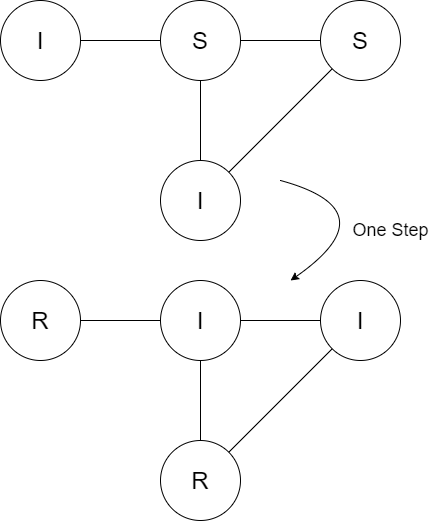

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Solution to Part B**:

Let G = the event that after 1 time step the top graph looks like the bottom graph. \
Let $N_i$ represent the nodes, where 0 is the leftmost node, 1 is the center node, 2 is the rightmost node, and 3 is the bottom node.  

$
P(G) = P(N_1 = R) \cap [ P(N_2 = I by N_1) \cup P(N_2 = I by N_4) ] \cap P(N_3 = I by N_4) \cap P(N_4 = R) \\ 
P(G) = (\gamma) \cap (\beta \cup \beta) \cap (\beta) \cap (\gamma) \\
P(G) = (\gamma) * (\beta + \beta) * (\beta) * (\gamma) \\
P(G) = (\gamma)^2(2\beta)^2
$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

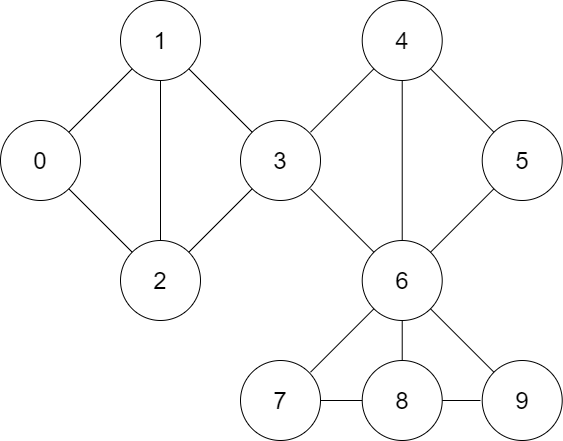

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [31]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], \
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [253]:
#Based off of graph given above. Take one step of SIR model, and returns the new states of vertices in the graph.
    #* Step 1:** First, consider all edges that connect an infected person to a susceptible person. The susceptible vertex becomes 
    #            infected with independent and identical probability  𝛽  *for each edge that that connects them to an infected vertex. 
    
    #* Step 2: ** Next, consider all infected (I) vertices that were infected at the *start of the time step - prior to step 1 - 
    #             and consider them recovered R with probability  𝛾 . 
    
import random

def SIR_step(initial_state, gamma, beta):
    
    #fill edges array 
    edges = []; 
    new_state = [];
    
    #initialize new_state values to their initial states. 
    for i in initial_state: 
        new_state.append(i)
        
    #fill edges array with graph edges
    for node in neighbors: 
        for adj in neighbors[node]: 
            if ( node < adj ): 
                edges.append((node, adj))
    
    #loop thru the edges and check the states of the nodes that it connects 
    for e in edges: 
        
        #compare the states of the nodes that are connected by edge e
        if initial_state[e[0]] != initial_state[e[1]]: #if connected nodes have different states, inspect further. 
            
            num1 = random.random()
            num2 = random.random()
            
            #check for already recovered nodes
            if ( initial_state[e[0]] == "R" or initial_state[e[1]] == "R" ) : 
                if ( initial_state[e[0]] == "I" ): 
                    if ( num1 <= gamma ): 
                        new_state[e[0]] = "R"
                    break; 
                elif ( initial_state[e[1]] == "I" ): 
                    if ( num1 <= gamma ): 
                        new_state[e[1]] = "R"
                    break; 
                else: 
                    break; 
            
            #change state of "I" and "S" nodes
            if initial_state[e[0]] == "I": #then e[1] is susceptable 
                    
                if ( num1 <= (gamma) ): #percent chance of recovery is (gamma*100)
                    new_state[e[0]] = "R"
            
                if ( num2 <= (beta) ): #probability of infection
                    new_state[e[1]] = "I" 
        
            else: #e[1] is the infected, and e[0] is the susceptable
                
                if ( num1 <= (gamma) ): 
                    new_state[e[1]] = "R"
                    
                if ( num2 <= (beta) ): 
                    new_state[e[0]] = "I"
                       
            
    return(new_state)

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [251]:
#Check your code is working for some trivial cases:

initial_state = ["S","I","I","S","S","S","S","S","S","I"]
gamma = .5
beta = .5
SIR_step(initial_state, gamma, beta)

['I', 'I', 'R', 'I', 'S', 'S', 'S', 'S', 'I', 'I']

In [252]:
initial_state = ["S","S","S","S","S","S","S","S","S","S"]
gamma = .5
beta = .5
SIR_step(initial_state,gamma,beta)

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [322]:

def sim500steps(): 
    
    initial_state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    beta = 0.2 
    gamma = 0.05
    
    #recommended per_run setup.  Put this in a loop/function:
    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'] # ':' represents null
    df_per_run.head()

    for i in range(0, 500): #500 time steps 
        initial_state = SIR_step(initial_state, gamma, beta)
        
        dfAdd = pd.DataFrame(data=None, columns=np.array(range(10))) 
        dfAdd.loc[0,:] = initial_state
        df_per_run = df_per_run.append(dfAdd.loc[0,:], ignore_index=True)
        

    return df_per_run


def InfectionEndTime(): 
    I_countByRow = [];
    for i in range(0, 500): 
        #print(df500.loc[i, :]) # this represents one ROW
        row = df500.loc[i, :]
        rowI = row[row == "I"]
        #print(rowI)

        I_countByRow.append(len(rowI))
        #print (I_countByRow)

        rowNum = len(I_countByRow)
        if(I_countByRow[rowNum-1] == 0): 
            #no more I nodes remaining
            #print("time step that infection ends: ", len(I_countByRow))
            return len(I_countByRow); 

    #print(rowNum, I_countByRow[rowNum-1])  
    #print(row)
    return 500;

endTimes = []; 
for n in range (0, 10):
    df500 = sim500steps()
    endTimes.append(InfectionEndTime())
print(endTimes)    



[120, 49, 500, 500, 119, 500, 500, 49, 162, 500]


In [367]:

def sim500steps(): 
    
    initial_state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    beta = 0.05 
    gamma = 0.2
    
    #recommended per_run setup.  Put this in a loop/function:
    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'] # ':' represents null
    df_per_run.head()

    for i in range(0, 500): #500 time steps 
        initial_state = SIR_step(initial_state, gamma, beta)
        
        dfAdd = pd.DataFrame(data=None, columns=np.array(range(10))) 
        dfAdd.loc[0,:] = initial_state
        df_per_run = df_per_run.append(dfAdd.loc[0,:], ignore_index=True)
        

    return df_per_run



def InfectionEndTime(): 
    I_countByRow = [];
    for i in range(0, 500): 
        #print(df500.loc[i, :]) # this represents one ROW
        row = df500.loc[i, :]
        rowI = row[row == "I"]
        #print(rowI)

        I_countByRow.append(len(rowI))
        #print (I_countByRow)

        rowNum = len(I_countByRow)
        if(I_countByRow[rowNum-1] == 0): 
            #no more I nodes remaining
            #print("time step that infection ends: ", len(I_countByRow))
            return len(I_countByRow); 

    #print(rowNum, I_countByRow[rowNum-1])  
    #print(row)
    return 500;

endTimes1 = []; 
for n in range (0, 10):
    df500 = sim500steps()
    endTimes1.append(InfectionEndTime())
print(endTimes1)  
        


[25, 500, 500, 2, 500, 500, 500, 500, 500, 8]


**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [366]:
#recommended output style:
#print('For beta=',beta,' and gamma=',gamma,' observed node zero never infected', p_0s  ,'proportion of the time')

def sim500steps(): 
    
    initial_state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    beta = 0.2 
    gamma = 0.05
    
    #recommended per_run setup.  Put this in a loop/function:
    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'] # ':' represents null
    df_per_run.head()

    for i in range(0, 400): #500 time steps 
        initial_state = SIR_step(initial_state, gamma, beta)
        
        dfAdd = pd.DataFrame(data=None, columns=np.array(range(10))) 
        dfAdd.loc[0,:] = initial_state
        df_per_run = df_per_run.append(dfAdd.loc[0,:], ignore_index=True)
        

    return df_per_run

df500 = sim500steps()
#print(df500)
print("---------------")
df = df500.loc[:,0].copy()
print(df)
dfList = df.to_list()
occurences = dfList.count("I")
infected = occurences/500
print("proportion of time that node 0 not infected: ", (1-infected))
    

        



#    row = 0     
#   df = df500.iloc[row].copy()
#   print(df)
    #infection over
    
    #row = row+1
    #print(df)
    
    #print(row)


---------------
0      S
1      S
2      S
3      S
4      S
      ..
396    R
397    R
398    R
399    R
400    R
Name: 0, Length: 401, dtype: object
proportion of time that node 0 not infected:  0.972


<br>

---
[Back to top](#top)
<a id='bot'></a>